#Import libraries and load dataset.


1.   We'll start by importing necessary Python libraries such as Pandas, NumPy, Matplotlib, and Scikit-learn.
Then, we'll load the dataset into a Pandas DataFrame for further analysis.
2.   Then, we'll load the dataset into a Pandas DataFrame for further analysis.




In [239]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [240]:
# Reading the CSV file into a DataFrame
df = pd.read_csv("cars.csv")

# Displaying the first few rows of the DataFrame
print(df.head())


   Id  year          brand                                    full_model_name  \
0   0  2016          Honda                                    Honda Brio S MT   
1   1  2012         Nissan                             Nissan Sunny XV Diesel   
2   2  2017         Toyota             Toyota Fortuner 2.8 4x2 MT [2016-2020]   
3   3  2017  Mercedes-Benz  Mercedes-Benz E-Class E 220d Expression [2019-...   
4   4  2012        Hyundai                  Hyundai Verna Fluidic 1.6 CRDi SX   

  model_name      price  distance_travelled(kms) fuel_type    city  \
0       Brio   425000.0                   9680.0    Petrol  Mumbai   
1      Sunny   325000.0                 119120.0    Diesel  Mumbai   
2   Fortuner  2650000.0                  64593.0    Diesel   Thane   
3    E-Class  4195000.0                  25000.0    Diesel  Mumbai   
4      Verna   475000.0                  23800.0    Diesel  Mumbai   

   brand_rank  car_age  
0           7      5.0  
1          11      9.0  
2           1    

**Let's see the column name**

In [241]:
df.columns

Index(['Id', 'year', 'brand', 'full_model_name', 'model_name', 'price',
       'distance_travelled(kms)', 'fuel_type', 'city', 'brand_rank',
       'car_age'],
      dtype='object')

**Let's remove the unnecessary Columns**

In [242]:
df.drop(["full_model_name","model_name","Id"], inplace =True,axis=1)

In [243]:
df.head()

,year,brand,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,2016,Honda,425000.0,9680.0,Petrol,Mumbai,7,5.0
1,2012,Nissan,325000.0,119120.0,Diesel,Mumbai,11,9.0
2,2017,Toyota,2650000.0,64593.0,Diesel,Thane,1,4.0
3,2017,Mercedes-Benz,4195000.0,25000.0,Diesel,Mumbai,2,4.0
4,2012,Hyundai,475000.0,23800.0,Diesel,Mumbai,14,9.0


In [244]:
#check for null Value
df.isnull().sum()

year                       0
brand                      0
price                      0
distance_travelled(kms)    0
fuel_type                  0
city                       0
brand_rank                 0
car_age                    0
dtype: int64

In [245]:
df.shape

(1725, 8)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1725 non-null   int64  
 1   brand                    1725 non-null   object 
 2   price                    1725 non-null   float64
 3   distance_travelled(kms)  1725 non-null   float64
 4   fuel_type                1725 non-null   object 
 5   city                     1725 non-null   object 
 6   brand_rank               1725 non-null   int64  
 7   car_age                  1725 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 107.9+ KB


In [247]:
df.describe()

,year,price,distance_travelled(kms),brand_rank,car_age
count,1725.000000,1.725000e+03,1725.000000,1725.000000,1725.000000
mean,2015.390725,1.494837e+06,53848.256232,15.731014,5.609275
std,3.207504,1.671658e+06,44725.541963,12.951122,3.207504
min,1990.000000,6.250000e+04,350.000000,1.000000,0.000000
25%,2013.000000,5.450000e+05,29000.000000,5.000000,3.000000
50%,2016.000000,8.750000e+05,49000.000000,14.000000,5.000000
75%,2018.000000,1.825000e+06,70500.000000,24.000000,8.000000
max,2021.000000,1.470000e+07,790000.000000,81.000000,31.000000


In [248]:
df.price.quantile(0.7)


1519999.9999999988

#Exploratory Data Analysis (EDA):

1) Univariate Analysis: We'll examine the distribution of each feature individually to understand its characteristics. This includes using histograms for numerical variables and bar plots for categorical variables.

2) Multivariate Analysis: We'll explore correlations between features to identify relationships and potential patterns in the data. This can be done using correlation matrices or pair plots.

#Univariate Analysis:
**a. Numerical Variables:**

Create **histograms** for each numerical variable to visualize their distributions.
Calculate *summary statistics* such as mean, median, standard deviation, minimum, and maximum values to understand the central tendency and spread of the data.
Identify any outliers or anomalies in the data by examining the histogram and summary statistics.

In [249]:
# Seeing the correlation
df.corr()

<ipython-input-249-8c5a3840a394>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,price,distance_travelled(kms),brand_rank,car_age
year,1.000000,0.288483,-0.386107,0.134275,-1.000000
price,0.288483,1.000000,-0.137351,-0.164591,-0.288483
distance_travelled(kms),-0.386107,-0.137351,1.000000,-0.111406,0.386107
brand_rank,0.134275,-0.164591,-0.111406,1.000000,-0.134275
car_age,-1.000000,-0.288483,0.386107,-0.134275,1.000000


#For Numerical Features:


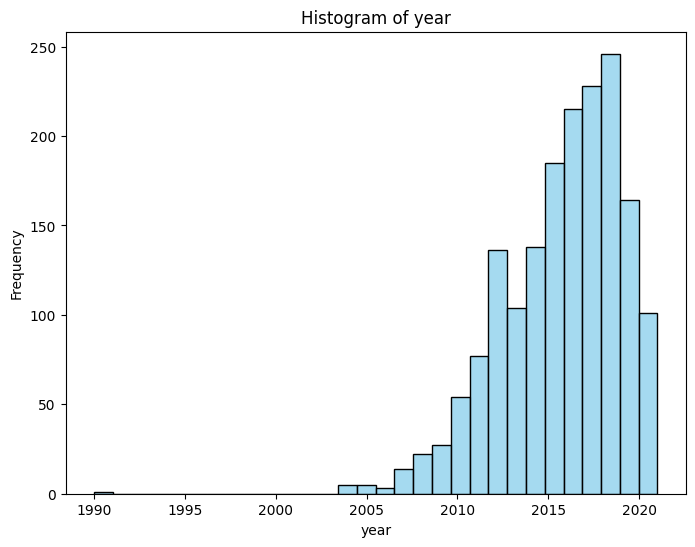

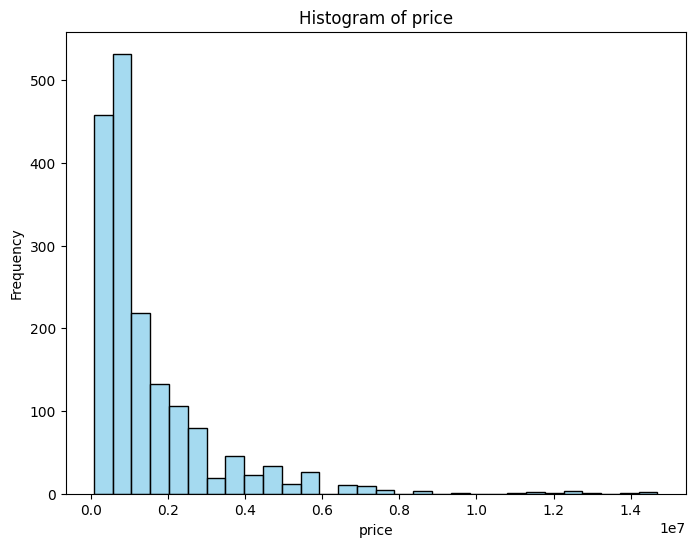

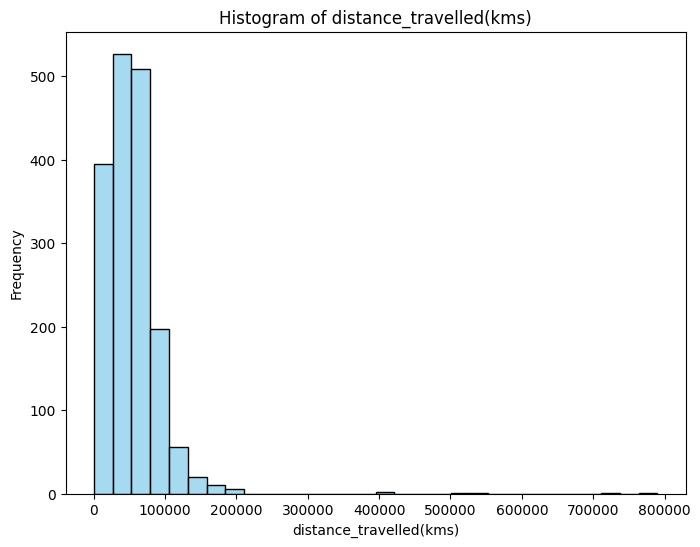

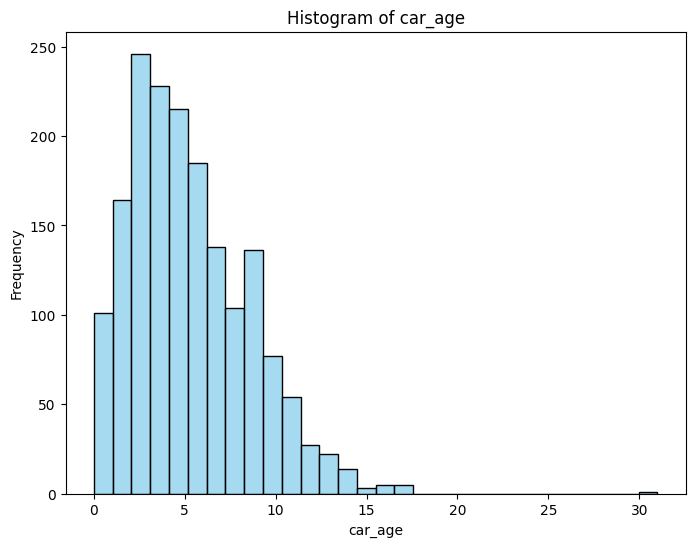

In [250]:
# Importing necessary libraries
import seaborn as sns

# Univariate analysis for numerical features using Seaborn
numerical_features = ['year', 'price', 'distance_travelled(kms)', 'car_age']

# Plot histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, bins=30, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [251]:
outlier=df[df['distance_travelled(kms)']>=70500.000000	]
outlier

,year,brand,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
1,2012,Nissan,325000.0,119120.0,Diesel,Mumbai,11,9.0
16,2016,Toyota,1035000.0,97679.0,Petrol,Mumbai,1,5.0
26,2012,BMW,925000.0,74460.0,Diesel,Mumbai,4,9.0
43,2014,Audi,1470000.0,78000.0,Diesel,Mumbai,10,7.0
44,2010,Audi,1550000.0,82000.0,Diesel,Mumbai,10,11.0
...,...,...,...,...,...,...,...,...
1678,2015,Toyota,1651000.0,81000.0,Petrol,Pune,1,6.0
1691,2016,Hyundai,1050000.0,75106.0,Diesel,Pune,14,5.0
1700,2016,Toyota,525000.0,102000.0,Diesel,Pune,1,5.0
1714,2014,Mahindra,775000.0,90000.0,Diesel,Pune,24,7.0


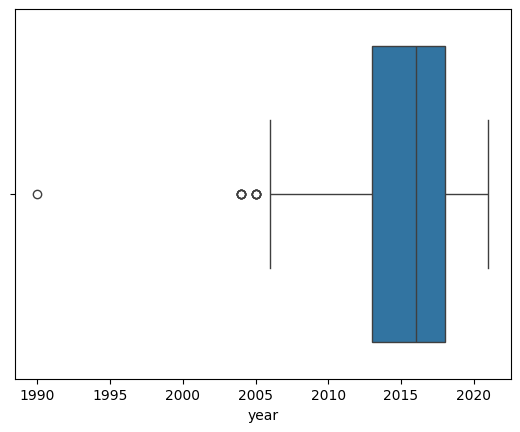

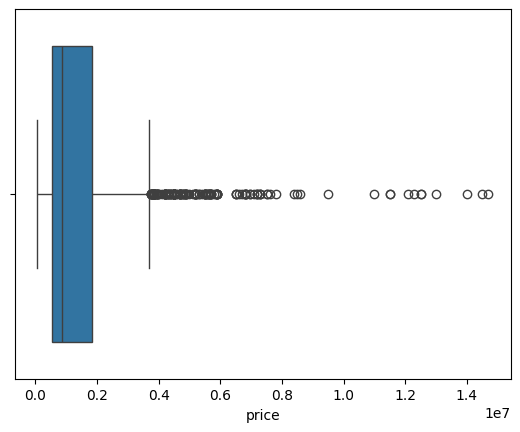

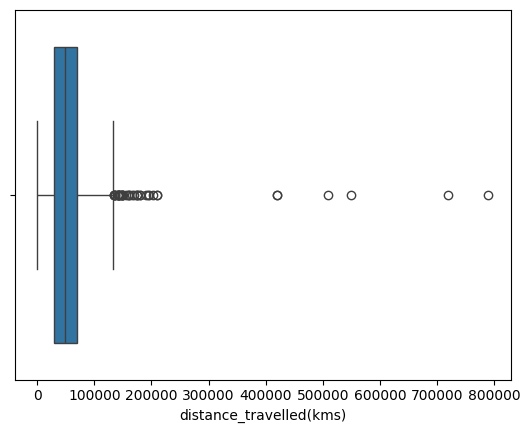

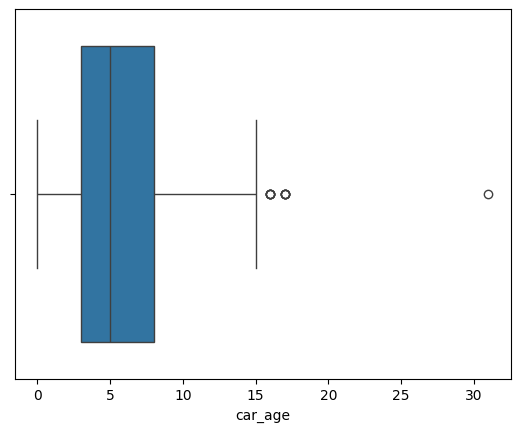

In [252]:
numerical_features = ['year', 'price', 'distance_travelled(kms)', 'car_age']
for features in numerical_features:
    sns.boxplot(data=df,x=features)
    plt.show()


#For Categorical Features:


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1725 non-null   int64  
 1   brand                    1725 non-null   object 
 2   price                    1725 non-null   float64
 3   distance_travelled(kms)  1725 non-null   float64
 4   fuel_type                1725 non-null   object 
 5   city                     1725 non-null   object 
 6   brand_rank               1725 non-null   int64  
 7   car_age                  1725 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 107.9+ KB


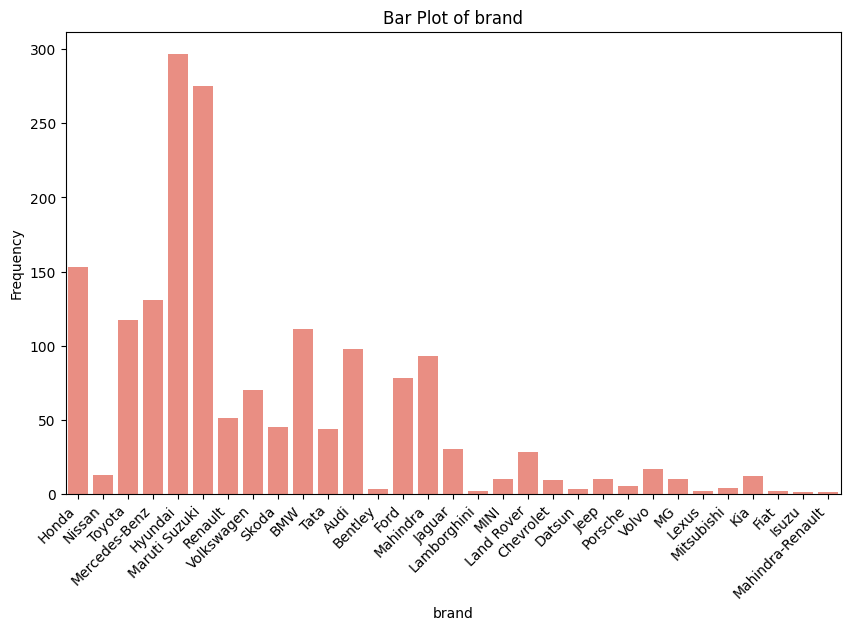

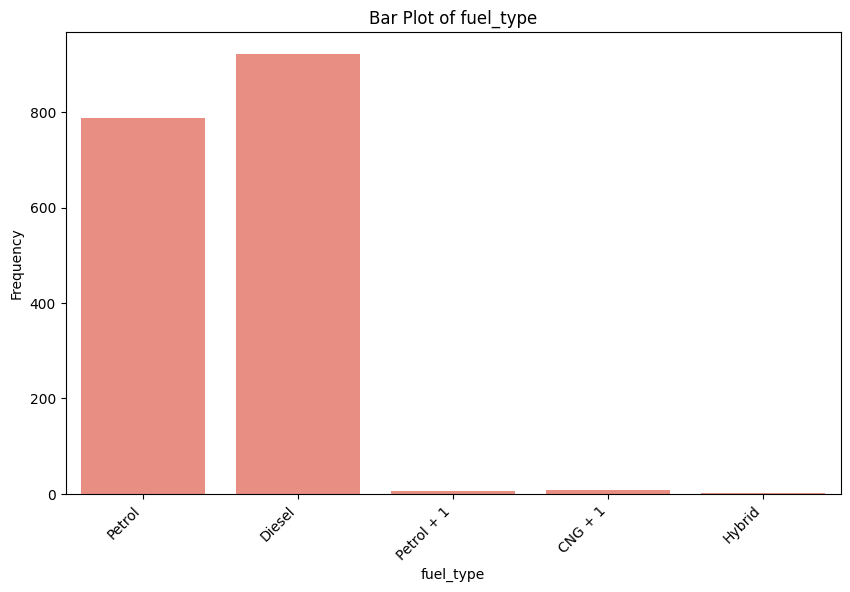

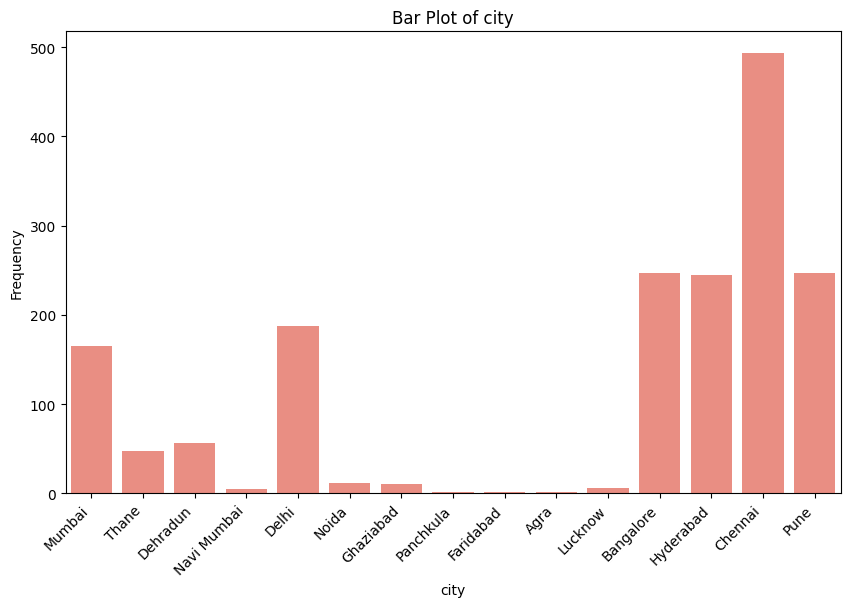

In [254]:
# Univariate analysis for categorical features using Seaborn
categorical_features = ['brand', 'fuel_type', 'city']

# Plot bar plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, color='salmon')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()


#Multivariate Analysis:
**a. Correlation Analysis:**

Create a correlation matrix to examine the pairwise correlations between numerical variables.
Visualize the correlation matrix using a heatmap to identify strong positive or negative correlations between variables.
Interpret the correlation coefficients to understand the strength and direction of relationships between variables.



**b. Pair Plots:**



Create pair plots (scatterplots) for a subset of numerical variables to visualize their relationships with each other.
Explore how changes in one variable affect another and identify any potential patterns or trends.
Color the points in the pair plot based on categorical variables to further analyze relationships across different groups.

Correlation Matrix Visualization using Seaborn:

<ipython-input-255-55d27d264623>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


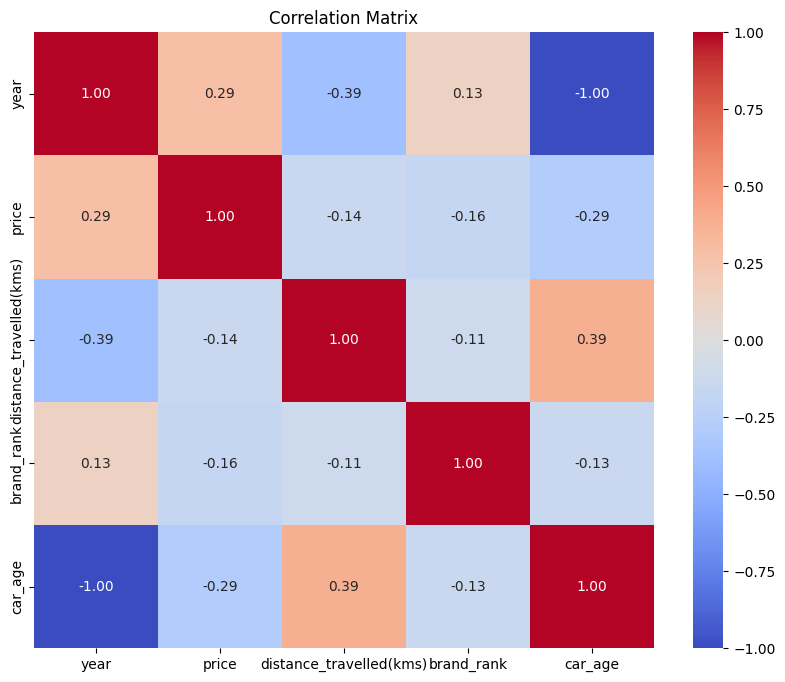

In [255]:
#a. Correlation Analysis:
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") #annot- If True, write the data value in each cell. || cmap: The mapping from data values to color space. || fmt: String formatting code to use when adding annotations.
plt.title('Correlation Matrix')
plt.show()


These features are most correlated, we will to analysis on these.

car_age - year -1


car_age- Distance_travelled 0.39



price - year 0.29





#Pair Plot using Seaborn:

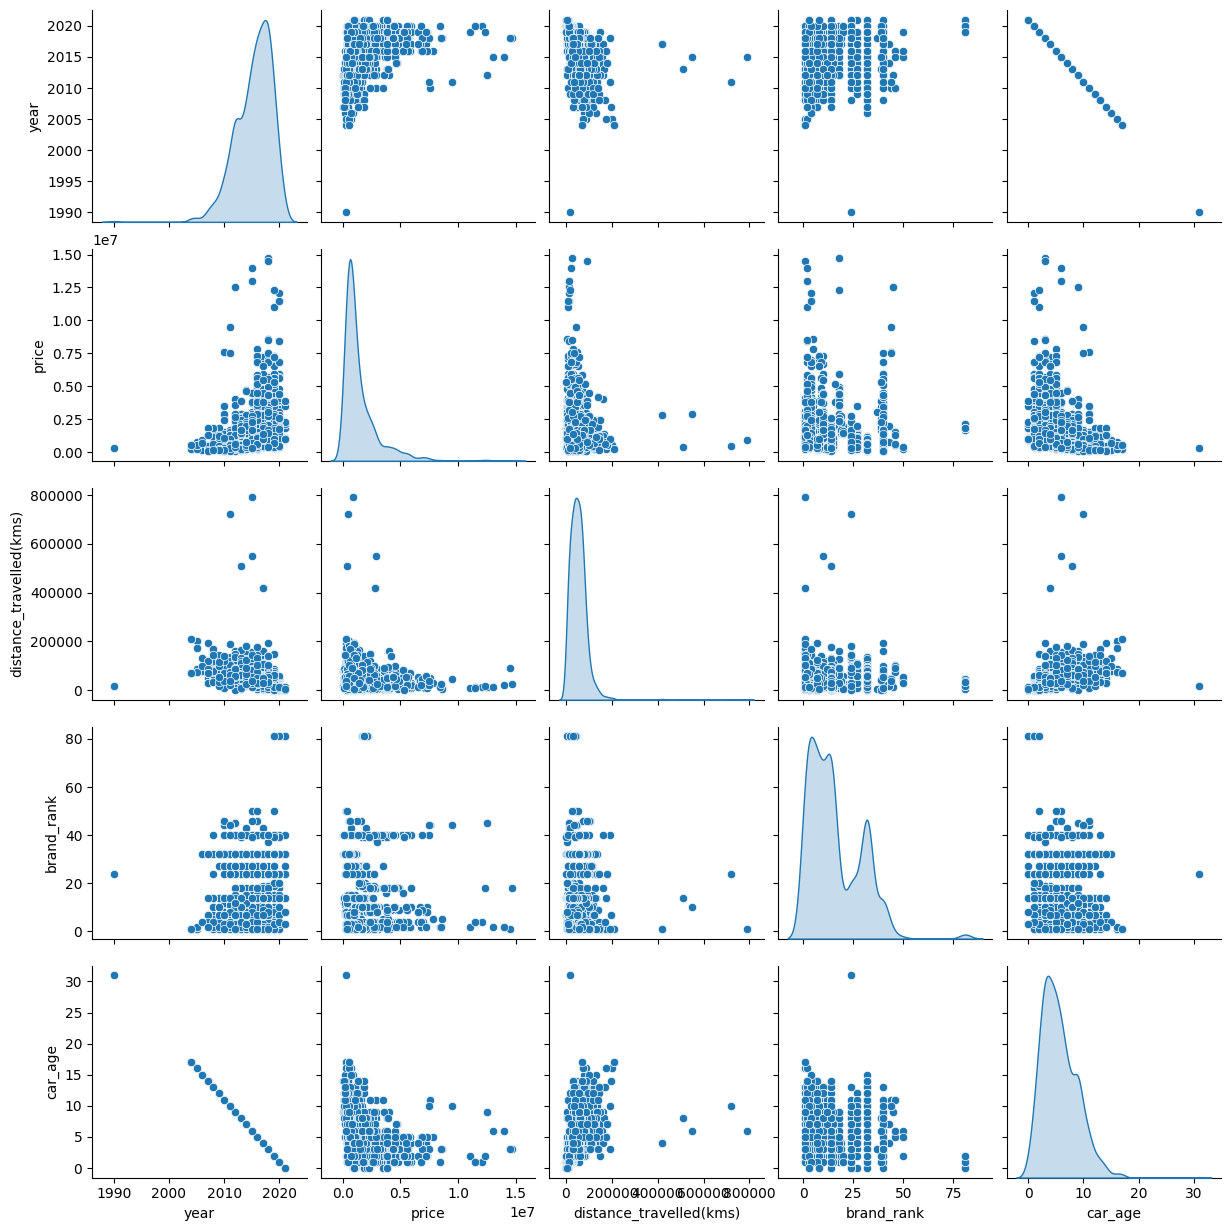

In [256]:
# Create pair plot
sns.pairplot(df, diag_kind='kde')
plt.show()


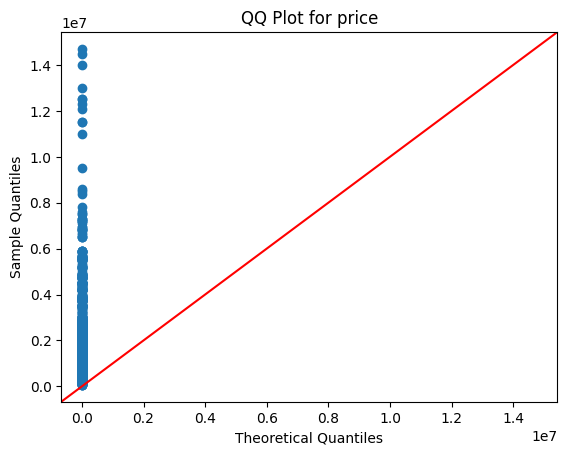

In [257]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Select a numerical variable from your dataset (e.g., 'price')
numerical_variable = 'price'

# Plot QQ plot
fig = sm.qqplot(df[numerical_variable], line='45')
plt.title('QQ Plot for {}'.format(numerical_variable))
plt.show()


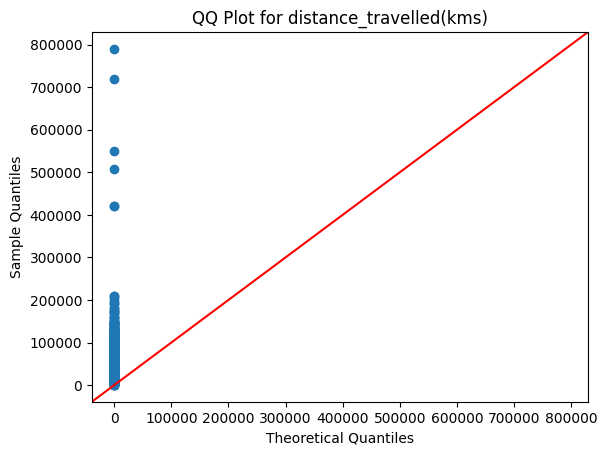

In [258]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Select a numerical variable from your dataset (e.g., 'price')
numerical_variable = 'distance_travelled(kms)'

# Plot QQ plot
fig = sm.qqplot(df[numerical_variable], line='45')
plt.title('QQ Plot for {}'.format(numerical_variable))
plt.show()

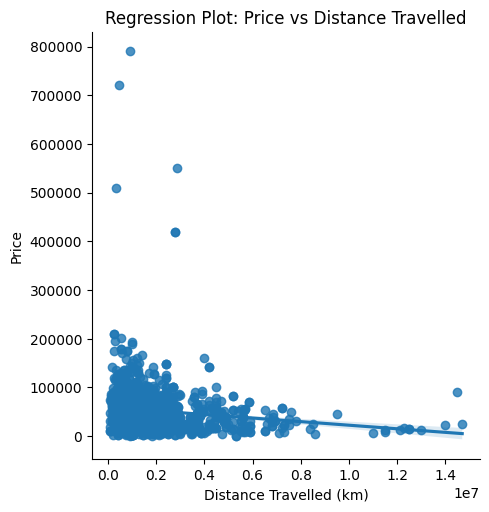

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'car_data' is your DataFrame and 'price' and 'distance_travelled' are columns in it
sns.lmplot(x='price', y='distance_travelled(kms)', data=df)
plt.title('Regression Plot: Price vs Distance Travelled')
plt.xlabel('Distance Travelled (km)')
plt.ylabel('Price')
plt.show()


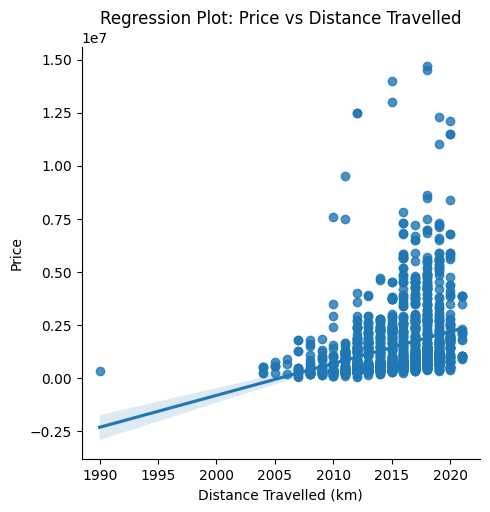

In [260]:
sns.lmplot(x='year', y='price', data=df)
plt.title('Regression Plot: Price vs Distance Travelled')
plt.xlabel('Distance Travelled (km)')
plt.ylabel('Price')
plt.show()

***We found out that our data is non-linear distributed***

#Machine learning part


In [261]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score


In [262]:
df.columns

Index(['year', 'brand', 'price', 'distance_travelled(kms)', 'fuel_type',
       'city', 'brand_rank', 'car_age'],
      dtype='object')

#Doing Feature importantion

To determine feature importance in a Support Vector Machine (SVM) regression model, we can't directly use coefficients as in linear models. However, we can use a method called Recursive Feature Elimination (RFE) combined with SVM to rank features based on their importance. Here's how you can do it using scikit-learn:



In [263]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
import numpy as np

# Initialize SVM model
svm_model = SVR(kernel='linear')  # Using linear kernel for simplicity, can be changed to other kernels

# Initialize RFE for feature selection
n_features_to_select = 5  # Specify the number of top features you want to select
rfe = RFE(estimator=svm_model, n_features_to_select=n_features_to_select)

# Fit RFE
rfe.fit(X, y)

# Get ranking of features
feature_ranking = rfe.ranking_

# Get selected features
selected_features = np.array(X.columns)[rfe.support_]

# Print feature ranking and selected features
print("Feature ranking:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_ranking[i]}")

print("\nSelected features:")
print(selected_features)


Feature ranking:
brand_rank: 1
car_age: 1
distance_travelled(kms): 1

Selected features:
['brand_rank' 'car_age' 'distance_travelled(kms)']


**Separating Independent and dependent variables.**

In [264]:
X= df[['brand_rank', 'car_age','distance_travelled(kms)']]
y=df["price"]

In [265]:
#Spliting train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 100)

Since our data is non-leaner, I'm choosing XGBoost algorithm

In [266]:
xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [267]:

score = xgbr.score(X_train,y_train)
score

0.9862807749436313

In [268]:
y_pred1 = xgbr.predict(X_test)
rscore1=r2_score(y_test, y_pred1)
rscore1

0.7950217094261363

In [269]:
df['Price_prediction']=xgbr.predict(X)
df.head(15)


,year,brand,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,Price_prediction
0,2016,Honda,425000.0,9680.0,Petrol,Mumbai,7,5.0,4.996936e+05
1,2012,Nissan,325000.0,119120.0,Diesel,Mumbai,11,9.0,3.655917e+05
2,2017,Toyota,2650000.0,64593.0,Diesel,Thane,1,4.0,2.440496e+06
3,2017,Mercedes-Benz,4195000.0,25000.0,Diesel,Mumbai,2,4.0,4.339519e+06
4,2012,Hyundai,475000.0,23800.0,Diesel,Mumbai,14,9.0,5.224438e+05
5,2012,Hyundai,335000.0,45000.0,Petrol,Mumbai,14,9.0,3.166709e+05
6,2019,Toyota,750000.0,19500.0,Petrol,Mumbai,1,2.0,8.048375e+05
7,2018,Mercedes-Benz,5500000.0,32000.0,Diesel,Mumbai,2,3.0,5.071268e+06
8,2017,Hyundai,565000.0,44329.0,Petrol,Mumbai,14,4.0,5.503857e+05
9,2015,Maruti Suzuki,510000.0,48286.0,Petrol,Mumbai,32,6.0,5.765996e+05


#Random forest

In [270]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Initialize Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=150, random_state=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1011207814345.3689
R-squared: 0.6364365096143205


#let's try SVM

In [271]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Adjust SVR parameters
svm_model = SVR(kernel='rbf', C=1.0, gamma='scale')

# Adjust train_test_split parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_model = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel is commonly used for SVM regression

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3179196921882.0674
R-squared: -0.15859244451547427


#Lasso predication

In [272]:
# Initialize Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Set the regularization parameter (alpha)

# Train the model
lasso_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2391425243556.53
R-squared: 0.1284946208465938


 It appears that the XGBoost model has the best predictive performance among the models evaluated, as indicated by the high R-squared value.

#These are most important features determines the price of used cars



Feature ranking:


brand_rank: 1


car_age: 1


distance_travelled(kms): 1



Selected features:


 ['brand_rank' 'car_age' 'distance_travelled(kms)']